In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # für 3D-Plot
from sklearn.linear_model import LinearRegression

# ============================================
# 1. Beispieldaten definieren
# ============================================
# X = zwei Features (z. B. Koordinaten)
# y = Zielwert (abhängige Variable)
X = np.array([
    [23, 36],
    [23, 34],
    [26, 29],
    [21, 40],
    [20, 33],
    [25, 35]
])
y = np.array([0.1, 0, 1.2, -0.5, -1.5, 0.7])

In [2]:
# ============================================
# 2. Lineares Regressionsmodell trainieren
# ============================================
# Wir passen ein lineares Modell an die Daten an:
# y ≈ β0 + β1 * Feature1 + β2 * Feature2
regr = LinearRegression().fit(X, y)

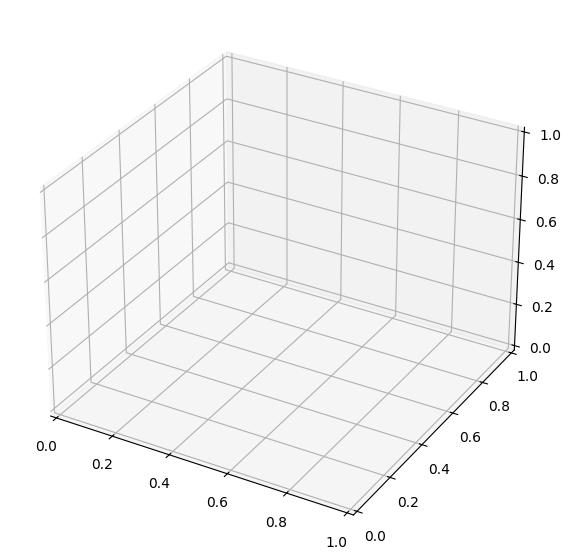

In [3]:
# ============================================
# 3. 3D-Plot vorbereiten
# ============================================
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


In [4]:

# ============================================
# 4. Originaldatenpunkte im 3D-Raum plotten
# ============================================
# x-Achse: Feature 1
# y-Achse: Feature 2
# z-Achse: Zielwert y
ax.scatter(
    X[:, 0],     # Feature 1
    X[:, 1],     # Feature 2
    y,           # Zielwert
    c=y,         # Farben entsprechen den y-Werten
    cmap='coolwarm',
    s=100,
    label='Daten'
)

In [5]:
# ============================================
# 5. Regressionsfläche berechnen
# ============================================
# Wir erzeugen ein Gitter von (Feature1, Feature2)-Werten
x_surf, y_surf = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
)

# Gitterpunkte in eine 2D-Matrix (n, 2) bringen
X_surf = np.column_stack((x_surf.ravel(), y_surf.ravel()))

# Modell sagt für jeden Gitterpunkt einen Zielwert vorher
z_surf = regr.predict(X_surf).reshape(x_surf.shape)

In [6]:
# ============================================
# 6. Regressionsfläche im 3D-Plot darstellen
# ============================================
ax.plot_surface(
    x_surf, y_surf, z_surf,
    alpha=0.5,           # Transparenz
    cmap='viridis',      # Farbskala
    edgecolor='none'     # keine Kantenlinien
    # Hinweis: "label" wird bei Flächen von matplotlib ignoriert
)

In [7]:
# ============================================
# 7. Achsen und Titel
# ============================================
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Zielwert (y)")
ax.set_title("3D-Plot mit Linearer Regression")

Text(0.5, 0.92, '3D-Plot mit Linearer Regression')

In [8]:

# ============================================
# 8. Plot anzeigen
# ============================================
plt.show()